# Ising Modell

Hamiltonian (from lecture):

$\mathcal{H}=-\frac{1}{2}\sum_{i,j}J_{\text{ij}}S_{\text{i}}S_{\text{j}}-B\sum_{i}S_{\text{i}}$

Hamiltonian (general):

$\mathcal{H}=-\frac{1}{2}\sum_{i=1}^{N}\sum_{j=1;j \neq i}^{N}J_{\text{ij}}S_{\text{i}}S_{\text{j}}-B\sum_{i}S_{\text{i}}$

Hamiltonian (pairs of next neighbor interaction and equal interaction strength $J_{\text{ij}}=J$ ):

$\mathcal{H}=-J\sum_{<i,j>}^{N,N}S_{\text{i}}S_{\text{j}}-B\sum_{i}S_{\text{i}}$

Simple sampling observables:

$\langle Q \rangle = \frac{\sum_i Q_i \exp{(-\beta E_i)}}{\sum_i\exp{(-\beta E_i)}}$ mit $\beta = 1/k_\text{B}T$

Magnetisation:

$ M = \sum_i S_i $

letzte Übung: Rückmeldung von 6 Leuten, Programme von 5 -> daraus habe ich best-of-Lösungen gemacht, siehe [github](https://github.com/MartinWenge/LectureWKMBP2020/blob/master/lecture1/lecturewkmbp_1.ipynb)

In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [36]:
''' class for ising simulation'''
class IsingSimulator:
    def __init__(self,L_ = 20, J_ = 1, B_ = 0):
        self.L = L_
        self.lattice = np.zeros( (self.L,self.L) )
        self.J = J_
        self.B = B_
        
    def randomize(self):
        self.lattice = 2*np.random.randint(2, size = self.lattice.shape)-1
    #
    
    def plotConfig(self):
        figure(111)
        pcolormesh(self.lattice)
        xlabel("Y")
        ylabel("X")
        show()
    #
    
    def foldBack(self, idx):
        if ( idx < 0 ):
            return (self.L-1)
        elif ( idx == self.L ):
            return 0
        else:
            return idx
    
    def singleSpinEnergy(self, x, y):
        nnb = self.lattice[ self.foldBack(x+1), y ] + self.lattice[self.foldBack(x-1),y] + self.lattice[x,self.foldBack(y+1)] + self.lattice[x,self.foldBack(y-1)]
        return -1.0 * self.lattice[x,y] * ( nnb * self.J + self.B )
    
    def getEnergy(self):
        E = 0
        for x in range(self.lattice.shape[0]):
            for y in range(self.lattice.shape[1]):
                E += self.singleSpinEnergy(x,y)
        return E/self.lattice.size
    
    def getMagnetisation(self):
        return ( np.sum(self.lattice)/self.lattice.size )
    
    def performMCS(self, temp, steps):
        if (self.lattice[0,0] == 0):
            self.randomize()
            
        checker = 0
        for s in range(steps):
            x = np.random.randint(self.L)
            y = np.random.randint(self.L)
            
            # energy old spin
            #e_old = self.singleSpinEnergy(x,y)
            # energy new spin
            #e_new = -1.0 * np.copy(e_old)
            # energy diff
            #De = e_new-e_old
            De = - 2*self.singleSpinEnergy(x,y)
            
            if (De < 0):
                self.lattice[x,y] *= -1
                checker += 1
            else:
                # probability to switch
                prob = np.exp(-De/temp )
                # apply metropolis -> D e < 0 , else [0,1] < prob
                if (np.random.random_sample() < prob ):
                    self.lattice[x,y] *= -1
                    checker += 1
                
            return checker
            

In [3]:
hugo = IsingSimulator(4)
hugo.lattice[ hugo.foldBack(3), 2 ]

0.0

In [37]:
hugo = IsingSimulator(20)

n_inter = 100000
temp = [3,2.5,2.2,2.0,1]
meanE = np.zeros(len(temp))
meanM = np.zeros(len(temp))
meanBF = np.zeros(len(temp))

for n, t in enumerate(temp):
    for i in range(100):
        hugo.randomize()
        e = hugo.getEnergy()
        m = hugo.getMagnetisation()
        bf = np.exp(-e/t)
        meanM[n] += m*bf
        meanE[n] += e*bf
        meanBF[n] += bf

print(meanM/meanBF, meanE/meanBF, meanBF)

[-0.00448811  0.00829208 -0.00284614  0.00271012 -0.00036713] [-0.00754778  0.00030601  0.02003147 -0.00307811 -0.03668768] [100.13884523  99.86215043  98.86096465  99.8672532  102.73429337]


<IPython.core.display.Javascript object>


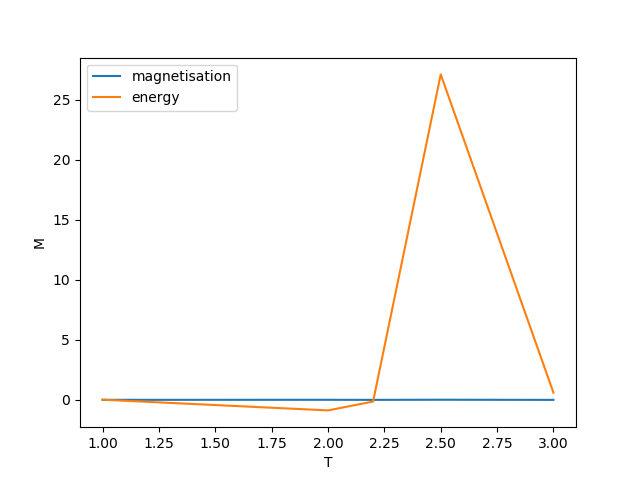

In [38]:
figure()
plot(temp,meanM/meanBF, label="magnetisation")
plot(temp,meanM/meanE, label="energy")
legend(loc="best")
xlabel("T")
ylabel("M")
show()

In [40]:
# importance sampling
hugo = IsingSimulator(20)
hugo.randomize()

n_samples = 10
n_step = 1
n_iter = 20000
temperature =1.4

data = np.zeros( (n_samples,n_iter) )

for n in range(n_samples):
    if (temperature < 2.3):
        hugo.performMCS(2.5,500)
        hugo.performMCS(2.3,500)
    if (temperature < 2.0):
        hugo.performMCS(2.2,500)
        hugo.performMCS(2.1,500)
        hugo.performMCS(2.0,500)
    if (temperature < 1.8):
        hugo.performMCS(1.9,500)
        hugo.performMCS(1.8,500)
    for i in range(n_iter):
        # simualtion von n_step schritten
        hugo.performMCS(temperature,n_step)
        data[n,i] = (hugo.getMagnetisation())
        

<IPython.core.display.Javascript object>


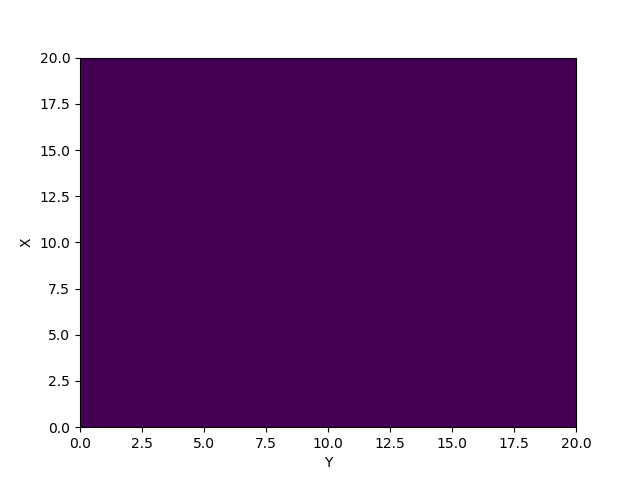

In [41]:
hugo.plotConfig()

<IPython.core.display.Javascript object>


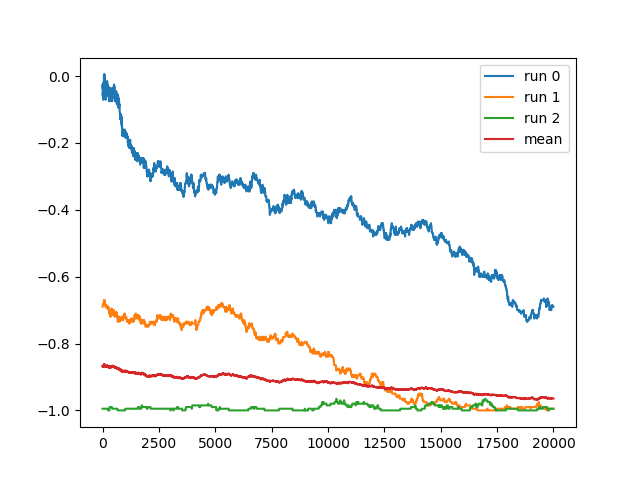

In [42]:
figure()
for i in range(data.shape)
plot(np.linspace(0,n_iter,n_iter), data[0,:], label= "run 0")
plot(np.linspace(0,n_iter,n_iter), data[1,:], label= "run 1")
plot(np.linspace(0,n_iter,n_iter), data[2,:], label= "run 2")
plot(np.linspace(0,n_iter,n_iter), data[3,:], label= "run 3")
plot(np.linspace(0,n_iter,n_iter), data[4,:], label= "run 4")
plot(np.linspace(0,n_iter,n_iter), data[5,:], label= "run 5")

plot(np.linspace(0,n_iter,n_iter), np.sum(data,axis=0)/n_samples, label= "mean")

legend(loc="best")

show()